## Assignment for Day 11 about correlation

___Gurumurthi Krishnamurthy___

    This notebook provides the details about the correlation in statistics with the help of the data set provided for attrition
    
    The dataset same is provided below   
    

   Age Attrition  ... YearsSinceLastPromotion YearsWithCurrManager
   
0   51        No  ...                       0                    0

1   31       Yes  ...                       1                    4

2   32        No  ...                       0                    3

3   38        No  ...                       7                    5

4   32        No  ...                       0                    4

5   46        No  ...                       7                    7

6   28       Yes  ...                       0                    0

7   29        No  ...                       0                    0

8   31        No  ...                       7                    8

9   25        No  ...                       1                    5



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_attrition_dataset(file = 'general_data.csv'):
    return pd.read_csv(file)

In [3]:
dataset = load_attrition_dataset()
print(dataset.head())
print(dataset.info())

   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0

In [4]:
dataset.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


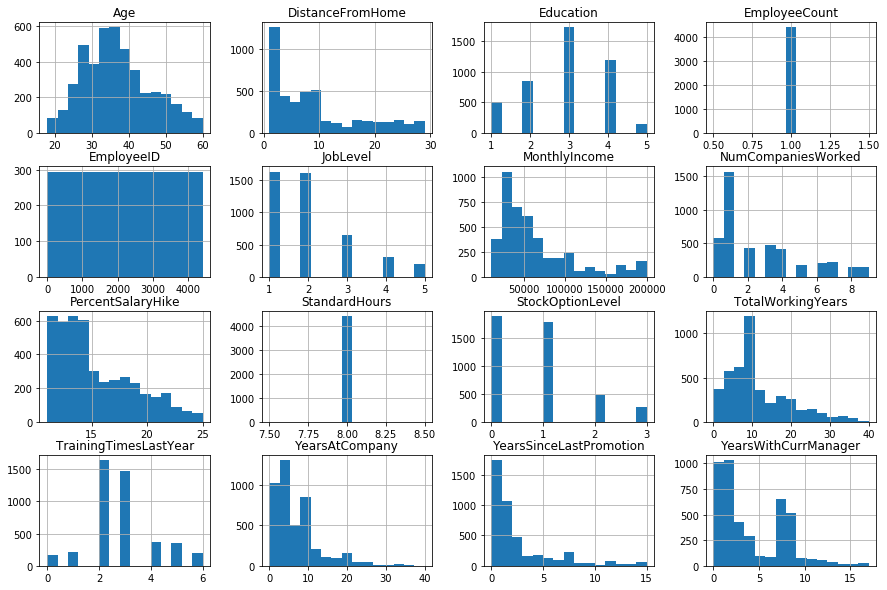

In [5]:
#Let's examine the histogram and observe the pattern
dataset.hist(bins=15, figsize=(15, 10))
plt.show()

__The above figure depics a high positive skewness on DistanceFromHome, YearsAtCompany, YearsSinceLastPromotion, TotalWorkingYears, YearsWithCurrentManager, PercentSalaryHike, MonthlyIncome etc., with Age is normally distributed__

### __Info from above dataset:__

Attrition is the dependent variable with the other 22 independent variables, Let us try to perform some data cleanup for the unique and duplicate values and remove single reference values

In [6]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool

In [7]:
dataset.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

__The following data fields has singular value counts and they are good to be dropped__

In [9]:
dataset.Over18.value_counts()

Y    4410
Name: Over18, dtype: int64

In [10]:
dataset.EmployeeCount.value_counts()

1    4410
Name: EmployeeCount, dtype: int64

In [11]:
dataset.StandardHours.value_counts()

8    4410
Name: StandardHours, dtype: int64

In [12]:
dataset.drop(columns = ['Over18', 'EmployeeCount', 'StandardHours'], inplace=True)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  PercentSalaryHike       

__We can Ignore the EmployeeID as it doesnt depend on the the attrition__

In [14]:
dataset.EmployeeID.value_counts()

2047    1
2632    1
2620    1
573     1
2624    1
       ..
1302    1
3347    1
1298    1
3343    1
2049    1
Name: EmployeeID, Length: 4410, dtype: int64

In [15]:
dataset.drop(columns='EmployeeID', inplace=True)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

_The NumCompaniesWorked and the TotalWorkingYears have some np.NaN fields which needs to be handled. 
Let us first examine the data values it contains_

### Handle the missing values for NumCompaniesWorked and TotalWorkingYears

In [17]:
# Handle Missing Values
# By inspecting the data's the NumCompaniesWorked and TotalWorkingYears have some NaN fields to be handled with its mean
dataset.NumCompaniesWorked.fillna(dataset.NumCompaniesWorked.mean(), inplace = True)
dataset.TotalWorkingYears.fillna(dataset.TotalWorkingYears.mean(), inplace = True)

In [18]:
dataset.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus'],
      dtype='object')

In [19]:
dataset.Attrition.value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

In [20]:
dataset.BusinessTravel.value_counts()

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64

In [21]:
dataset.Department.value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64

In [22]:
dataset.EducationField.value_counts()

Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64

In [23]:
dataset.Gender.value_counts()

Male      2646
Female    1764
Name: Gender, dtype: int64

In [24]:
dataset.JobRole.value_counts()

Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64

In [25]:
dataset.MaritalStatus.value_counts()

Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64

In [26]:
## For Now, Handle the Attrition with a label binarizer and split the dataset into two based on the Attrition Yes and No
dataset1 = dataset.copy()

In [27]:
from sklearn.preprocessing import LabelBinarizer
lblBinarizer = LabelBinarizer()
dataset1.Attrition = lblBinarizer.fit_transform(dataset1.Attrition)

In [28]:
ds_yes = dataset1.loc[dataset1.Attrition == 1]
print(ds_yes.head())
print(ds_yes.info())

    Age  Attrition     BusinessTravel              Department  \
1    31          1  Travel_Frequently  Research & Development   
6    28          1      Travel_Rarely  Research & Development   
13   47          1         Non-Travel  Research & Development   
28   44          1  Travel_Frequently  Research & Development   
30   26          1      Travel_Rarely  Research & Development   

    DistanceFromHome  Education EducationField  Gender  JobLevel  \
1                 10          1  Life Sciences  Female         1   
6                 11          2        Medical    Male         2   
13                 1          1        Medical    Male         1   
28                 1          2        Medical    Male         2   
30                 4          3        Medical    Male         3   

               JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
1   Research Scientist        Single          41890                 0.0   
6      Sales Executive        Single          5813

In [29]:
ds_no = dataset1.loc[dataset1.Attrition == 0]
print(ds_no.head())
print(ds_no.info())

   Age  Attrition     BusinessTravel              Department  \
0   51          0      Travel_Rarely                   Sales   
2   32          0  Travel_Frequently  Research & Development   
3   38          0         Non-Travel  Research & Development   
4   32          0      Travel_Rarely  Research & Development   
5   46          0      Travel_Rarely  Research & Development   

   DistanceFromHome  Education EducationField  Gender  JobLevel  \
0                 6          2  Life Sciences  Female         1   
2                17          4          Other    Male         4   
3                 2          5  Life Sciences    Male         3   
4                10          1        Medical    Male         1   
5                 8          3  Life Sciences  Female         4   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160                 1.0   
2            Sales Executive       Married        

In [30]:
ds_corr = dataset1.corr()
ds_corr

,Age,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.006963,-0.035706,-0.002884,-0.044314,0.298528,-0.033137,-0.031753,0.680419,-0.027308,0.311309,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.009730,-0.015111,-0.010290,-0.031176,0.042232,0.032533,-0.006839,-0.170111,-0.049431,-0.134392,-0.033019,-0.156199
DistanceFromHome,0.006963,-0.009730,1.000000,-0.008638,-0.037329,-0.021607,-0.013818,0.038125,0.011169,0.009361,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.015111,-0.008638,1.000000,0.045746,0.006410,-0.016219,-0.040531,0.001261,-0.010712,0.010472,0.006080,0.022490,0.005358
JobLevel,-0.002884,-0.010290,-0.037329,0.045746,1.000000,0.047316,-0.009844,0.010973,0.000993,-0.036934,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.031176,-0.021607,0.006410,0.047316,1.000000,-0.020710,0.004325,0.026930,-0.033758,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.298528,0.042232,-0.013818,-0.016219,-0.009844,-0.020710,1.000000,0.030825,0.017130,0.238052,-0.032239,-0.117820,-0.036618,-0.109480
PercentSalaryHike,-0.033137,0.032533,0.038125,-0.040531,0.010973,0.004325,0.030825,1.000000,0.012548,-0.018717,-0.037392,-0.029707,-0.029542,-0.040864
StockOptionLevel,-0.031753,-0.006839,0.011169,0.001261,0.000993,0.026930,0.017130,0.012548,1.000000,0.002693,-0.069902,0.007886,0.019063,0.017757
TotalWorkingYears,0.680419,-0.170111,0.009361,-0.010712,-0.036934,-0.033758,0.238052,-0.018717,0.002693,1.000000,-0.040705,0.626876,0.403995,0.458425


### Correlation of Variables

Let us find the correlation between the Age and Attrition

In [31]:
from scipy.stats import pearsonr

#### Hypothesis Related with the R^2

H-0: There is no significant relationship with Age respect to the Attrition

H-A: There is a significant relationship with Age respect to the Attrition

In [35]:
def checkHyp(p, param1, param2):
    if p < 0.05:
        print("Reject H-0: significant relationship with {0} and {1}".format(param1, param2))
    else:
        print("Accept H-0: No Significant relationship with {0} and {1}".format(param1, param2))

In [37]:
r, _ = pearsonr(dataset1.Attrition, dataset1.Age)
print(r)
checkHyp(r ** 2, "Attrition", "Age")

-0.15920500686577965
Reject H-0: significant relationship with Attrition and Age


### Statistical Test

Run a statistical test with Distance from home vs Attrition

In [38]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(ds_no.DistanceFromHome, ds_yes.DistanceFromHome)
checkHyp(p, "DistanceFromHome-NoAttrition", "DistanceFromHome-YesAttrition")

Accept H-0: No Significant relationship with DistanceFromHome-NoAttrition and DistanceFromHome-YesAttrition


### Handle the Categorical data

Based on our above analysis we found that the categorical data has lower magnitude hence we can apply the LabelEncoder rather than a sparse matrix

In [39]:
from sklearn.preprocessing import LabelEncoder
dataset1 = dataset1.apply(LabelEncoder().fit_transform)

In [40]:
import seaborn as sns

C:\Users\gkrishnamurthy\Anaconda3\conda\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\gkrishnamurthy\Anaconda3\conda\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


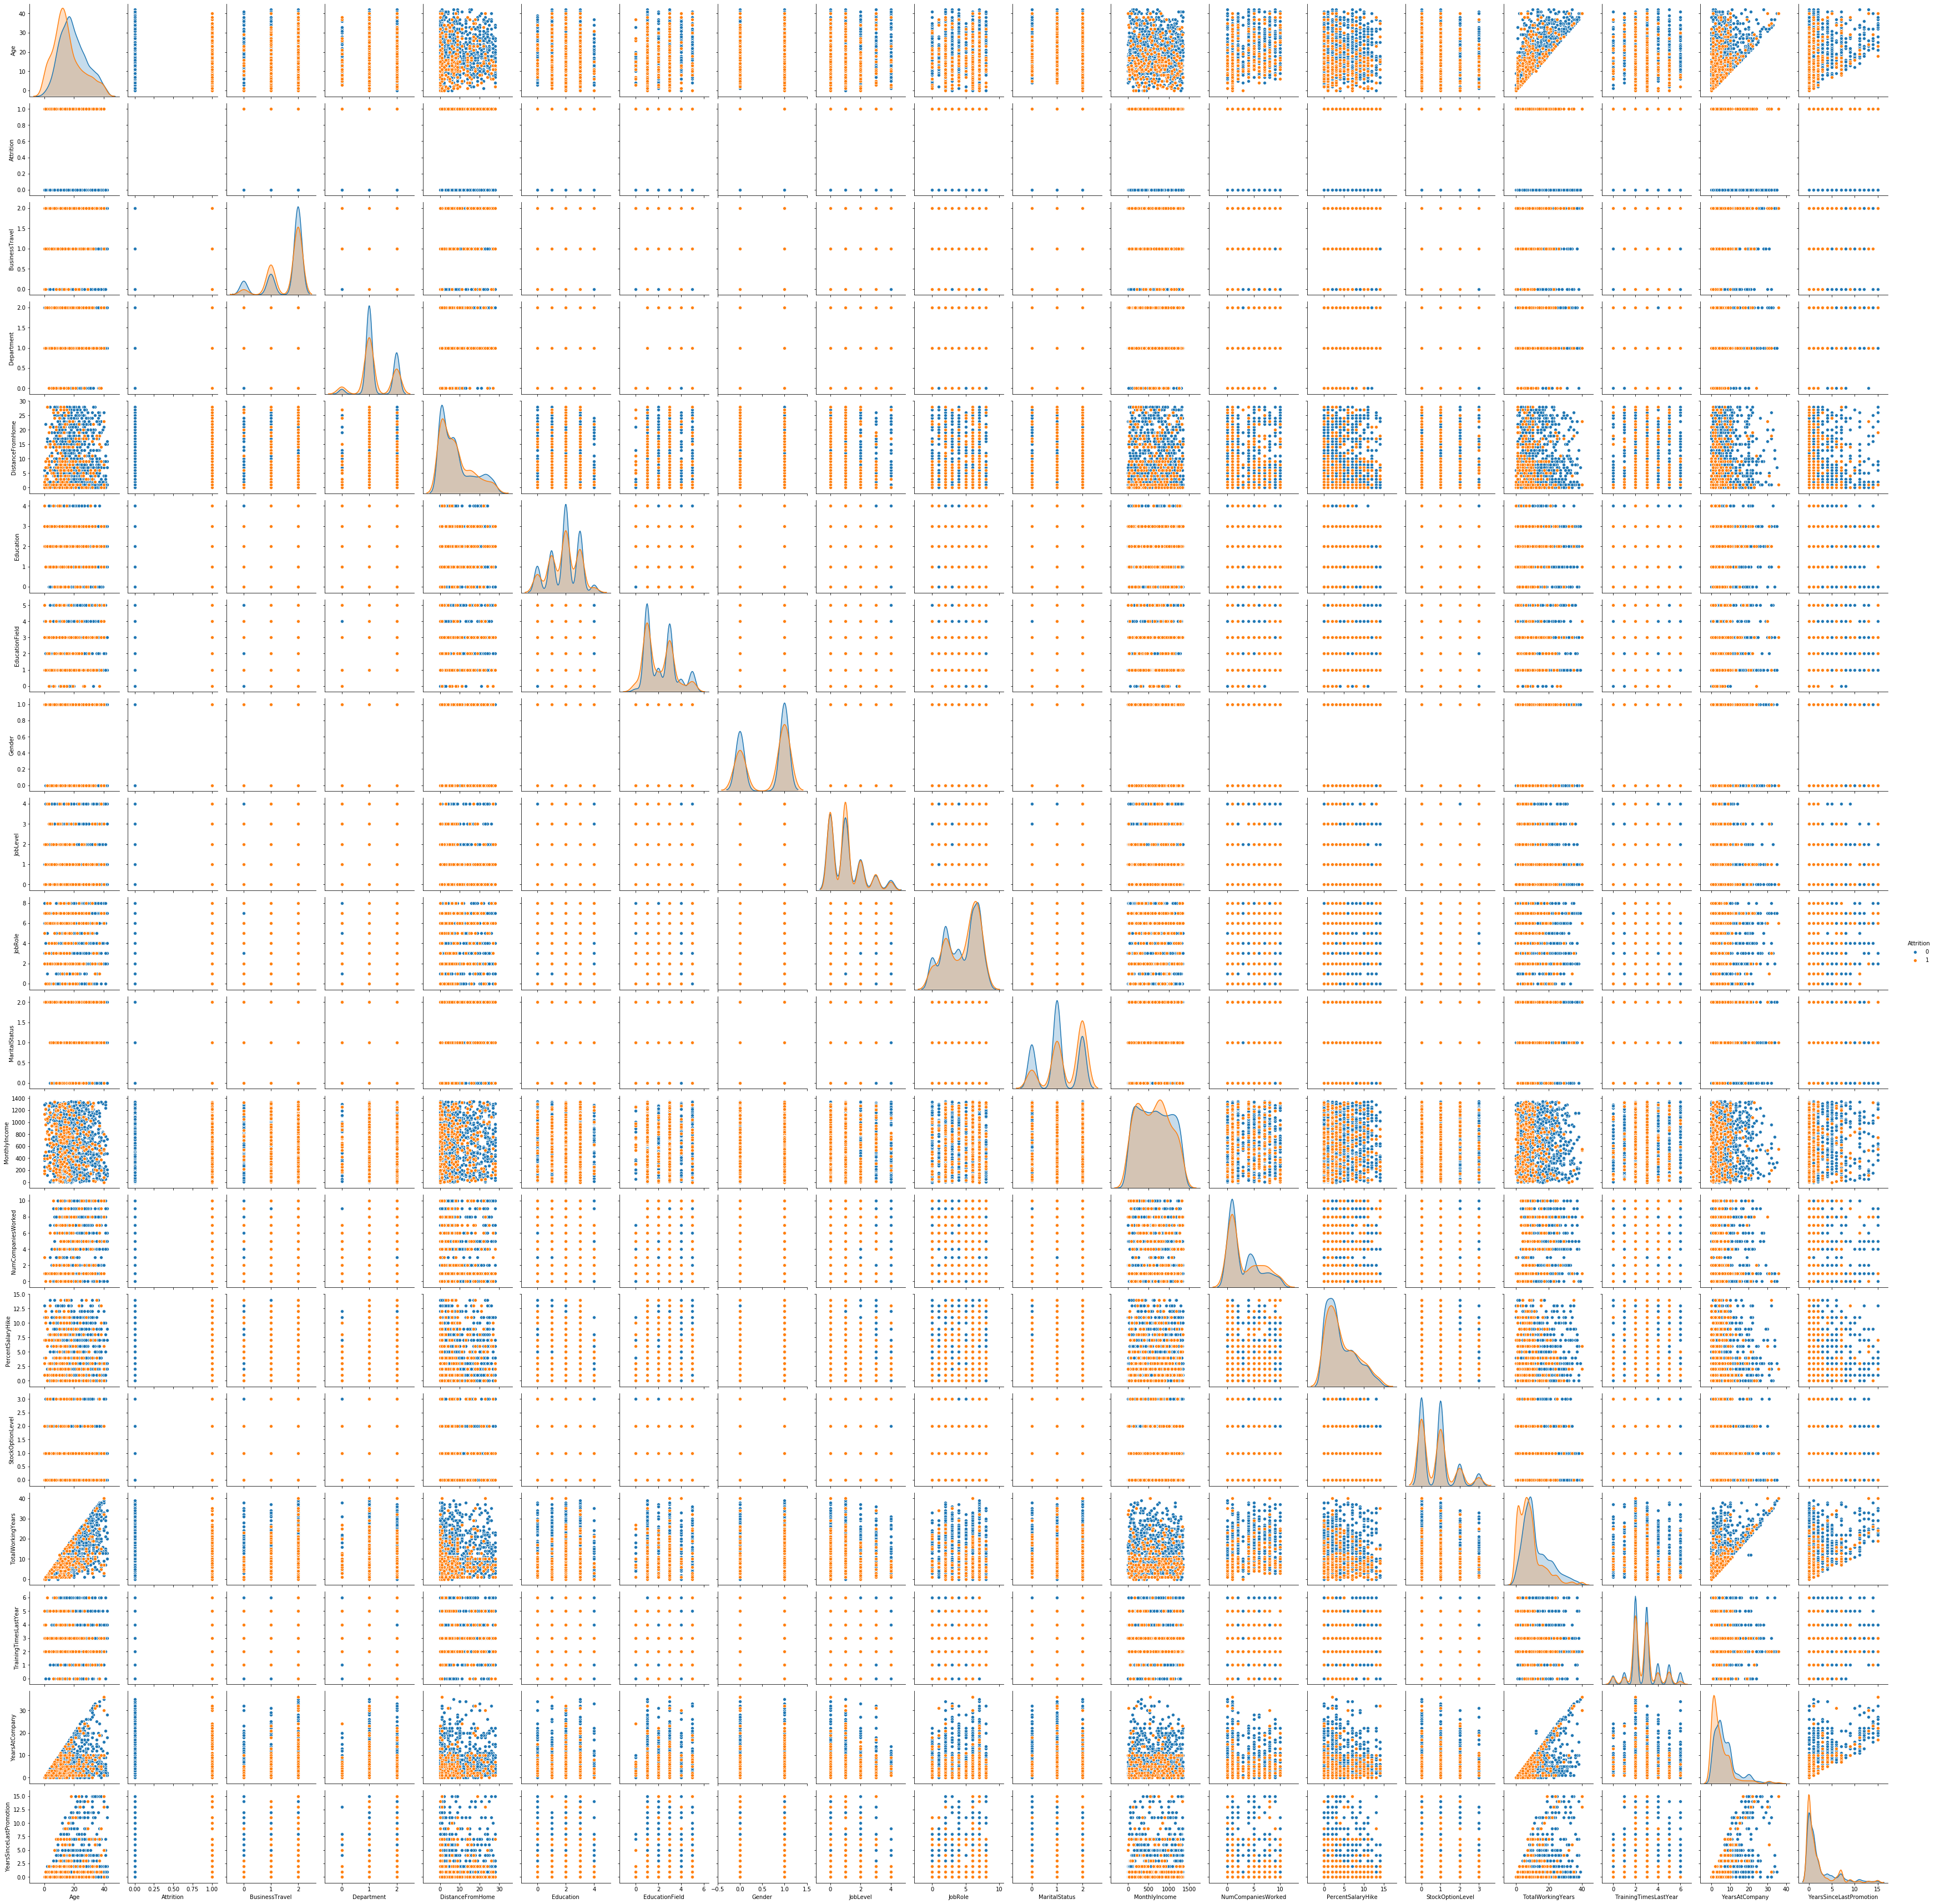

In [41]:
sns.pairplot(dataset1, hue="Attrition", vars=dataset1.columns[:-1])
plt.show()

#### Based on the above pairplot there is a higher correlation found with the TotalWorkingYears and YearsAtCompany,

Let us dump the correlation matrix and observe the pattern

In [42]:
corr = dataset1.corr()
corr.Attrition.sort_values(ascending=False)

Attrition                  1.000000
MaritalStatus              0.162070
NumCompaniesWorked         0.037286
PercentSalaryHike          0.032533
JobRole                    0.025809
Gender                     0.018125
BusinessTravel             0.000074
StockOptionLevel          -0.006839
DistanceFromHome          -0.009730
JobLevel                  -0.010290
Education                 -0.015111
MonthlyIncome             -0.024910
YearsSinceLastPromotion   -0.033019
Department                -0.048206
TrainingTimesLastYear     -0.049431
EducationField            -0.057940
YearsAtCompany            -0.136932
YearsWithCurrManager      -0.156199
Age                       -0.159205
TotalWorkingYears         -0.170156
Name: Attrition, dtype: float64

In [43]:
stat, p = mannwhitneyu(ds_no.TotalWorkingYears, ds_yes.TotalWorkingYears)
print(stat, p)

908192.0 1.368339420243565e-39


In [44]:
checkHyp(p, "TotalWorkingYears-NoAttrition", "TotalWorkingYears-YesAttrition")

Reject H-0: significant relationship with TotalWorkingYears-NoAttrition and TotalWorkingYears-YesAttrition


In [45]:
stat, p = mannwhitneyu(ds_yes.YearsAtCompany, ds_no.YearsAtCompany)
print(stat, p)
checkHyp(p, "YearsAtCompany-NoAttrition", "YearsAtCompany-YesAttrition")

923238.0 6.047598261692858e-37
Reject H-0: significant relationship with YearsAtCompany-NoAttrition and YearsAtCompany-YesAttrition


In [46]:
stat, p = mannwhitneyu(ds_yes.NumCompaniesWorked, ds_no.NumCompaniesWorked)
print(stat, p)
checkHyp(p, "NumCompaniesWorked-NoAttrition", "NumCompaniesWorked-YesAttrition")

1257122.5 0.028098156273425677
Reject H-0: significant relationship with NumCompaniesWorked-NoAttrition and NumCompaniesWorked-YesAttrition
